In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

# Завантаження даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Перетворення міток у категоріальні
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Створення моделі
model = Sequential()

# Додаємо більше згорткових шарів з ядрами 5x5
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)


c:\Users\micha\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5497 - loss: 1.2024 - val_accuracy: 0.7935 - val_loss: 0.5493
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7806 - loss: 0.6067 - val_accuracy: 0.8283 - val_loss: 0.4651
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8089 - loss: 0.5310 - val_accuracy: 0.8426 - val_loss: 0.4244
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8281 - loss: 0.4773 - val_accuracy: 0.8571 - val_loss: 0.3865
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8381 - loss: 0.4478 - val_accuracy: 0.8631 - val_loss: 0.3640
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8495 - loss: 0.4193 - val_accuracy: 0.8733 - val_loss: 0.3455
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8544 - loss: 0.4038 - val_accuracy: 0.8712 - val_loss: 0.3385
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8577 - loss: 0.3876 - val_accu

Навчальні дані:

Точність: 95.07%
Втрата: 0.1342
Валідаційні дані:

Точність: 89.97%
Втрата: 0.3494
Тестові дані:

Точність: 89.07%
Втрата: 0.4049

Бачимо невелике покращення в порівнянні з попередньою багатошаровою мережею


Частина 2

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, UpSampling2D, Cropping2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train = np.repeat(x_train, 3, axis=-1)  # Конвертація зображень в RGB
x_test = np.repeat(x_test, 3, axis=-1)    # Конвертація зображень в RGB

# Нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

# Створення моделі
input_tensor = Input(shape=(28, 28, 3))

# Декодування до розміру 32x32
x = UpSampling2D(size=(2, 2))(input_tensor)  

# Further resizing to 32x32 using Cropping2D
x = tf.keras.layers.Cropping2D(cropping=((12, 12), (12, 12)))(x)  

# Завантаження базової моделі
conv_layers_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замороження певних шарів базової моделі
n = 13
for layer in conv_layers_vgg16.layers[:n]:
    layer.trainable = False
for layer in conv_layers_vgg16.layers[n:]:
    layer.trainable = True

# Додавання базової моделі
x = conv_layers_vgg16(x, training=False)  
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

# Побудова фінальної моделі
model = Model(inputs=input_tensor, outputs=output)

# Компиляція моделі
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 607s 323ms/step - accuracy: 0.6965 - loss: 0.8942 - val_accuracy: 0.8183 - val_loss: 0.5314
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 593s 316ms/step - accuracy: 0.8229 - loss: 0.5211 - val_accuracy: 0.8352 - val_loss: 0.4950
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 594s 317ms/step - accuracy: 0.8395 - loss: 0.4701 - val_accuracy: 0.8333 - val_loss: 0.4678
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 574s 306ms/step - accuracy: 0.8454 - loss: 0.4516 - val_accuracy: 0.8513 - val_loss: 0.4421
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 553s 295ms/step - accuracy: 0.8602 - loss: 0.4097 - val_accuracy: 0.8578 - val_loss: 0.4424
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 609s 325ms/step - accuracy: 0.8617 - loss: 0.3956 - val_accuracy: 0.8580 - val_loss: 0.4310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 603s 322ms/step - accuracy: 0.8688 - loss: 0.3876 - val_accuracy: 0.8453 - val_loss: 0.4563
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 587s 313ms/step - ac

Точність (accuracy):

Тренувальна: Зросла з 0.6965 на початку до 0.8772 на кінці.
Валідаційна: Зросла з 0.8183 до 0.8606.
Втрати (loss):

Тренувальні: Зменшилися з 0.8942 до 0.3517.
Валідаційні: Невеликий зріст, з 0.5314 до 0.4519.


А тепер зробимо деякі маніпуляції параметрами мережі :-)

Налаштування гіперпараметрів: Ми спробуємо різні параметри для LSTM,  кількість нейронів, розмір батчу, та кількість епох.

Спробуємо двосторонню LSTM або додати більше шарів.

Додамо більше Dropout шарів або інших технік регуляризації, щоб зменшити ризик перенавчання.

In [8]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# Параметри
max_features = 10000  # кількість найбільш частих слів
maxlen = 100  # довжина послідовностей
embedding_dim = 128
epochs = 10
batch_size = 32

# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Просте RNN
model_rnn = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# LSTM
model_lstm = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Двостороння LSTM
model_bi_lstm = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])
model_bi_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_bi_lstm = model_bi_lstm.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Оцінка моделей
print("Evaluating Simple RNN:")
results_rnn = model_rnn.evaluate(x_test, y_test)
print(f"Test loss: {results_rnn[0]}")
print(f"Test accuracy: {results_rnn[1]}")

print("\nEvaluating LSTM:")
results_lstm = model_lstm.evaluate(x_test, y_test)
print(f"Test loss: {results_lstm[0]}")
print(f"Test accuracy: {results_lstm[1]}")

print("\nEvaluating Bidirectional LSTM:")
results_bi_lstm = model_bi_lstm.evaluate(x_test, y_test)
print(f"Test loss: {results_bi_lstm[0]}")
print(f"Test accuracy: {results_bi_lstm[1]}")


x_train shape: (25000, 100)
y_train shape: (25000,)
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6007 - loss: 0.6451 - val_accuracy: 0.6920 - val_loss: 0.5760
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8080 - loss: 0.4240 - val_accuracy: 0.7710 - val_loss: 0.5122
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9435 - loss: 0.1553 - val_accuracy: 0.7920 - val_loss: 0.5599
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9774 - loss: 0.0675 - val_accuracy: 0.7774 - val_loss: 0.7034
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9923 - loss: 0.0266 - val_accuracy: 0.7274 - val_loss: 1.0031
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9849 - loss: 0.0433 - val_accuracy: 0.7282 - val_loss: 1.0423
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9941 - loss: 0.0200 - val_accuracy: 0.7722 - val_loss: 0.9405
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━

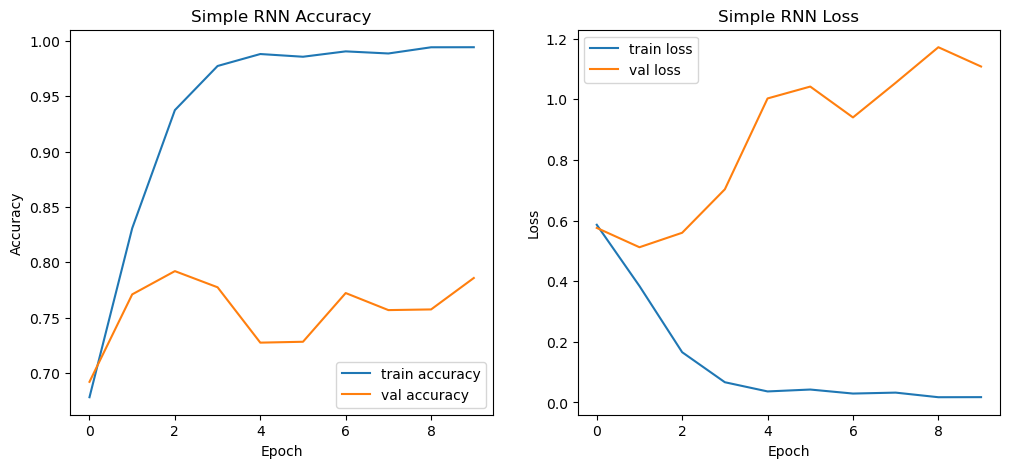

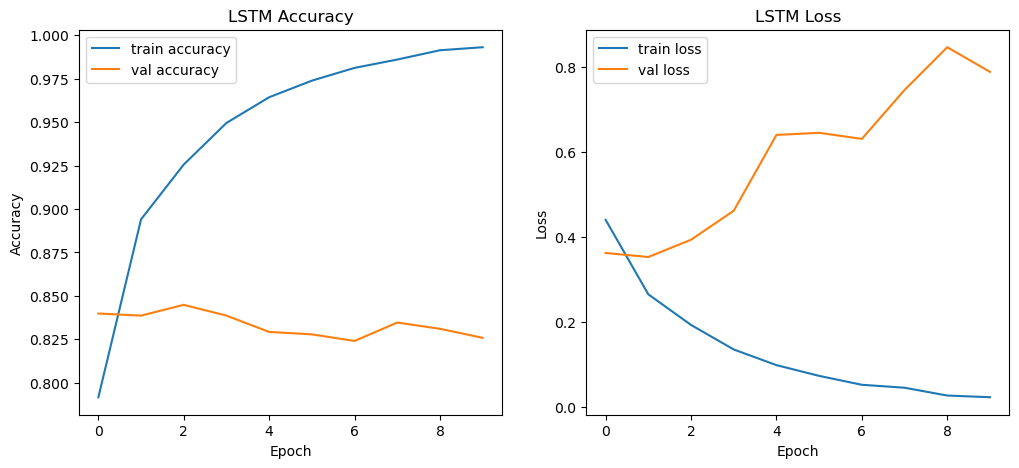

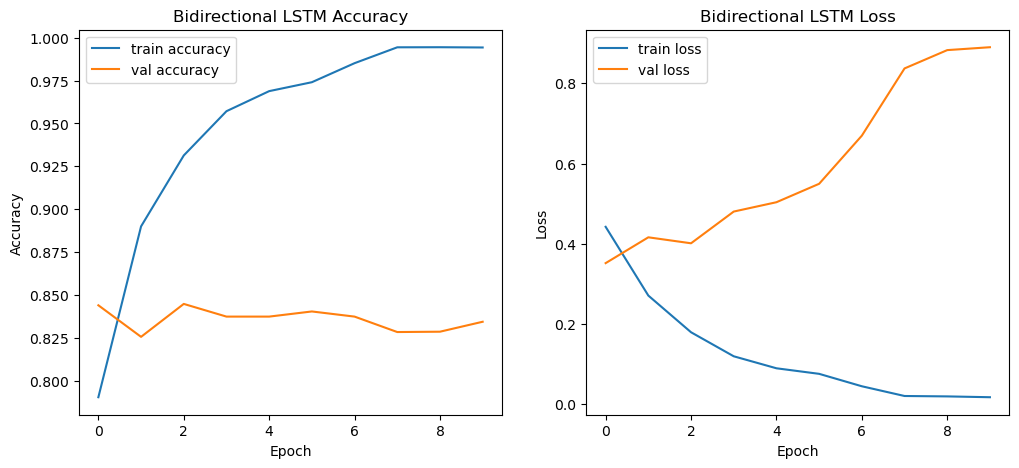

In [9]:
import matplotlib.pyplot as plt

# Функція для побудови графіків
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    
    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Побудова графіків для Simple RNN
plot_history(history_rnn, 'Simple RNN')

# Побудова графіків для LSTM
plot_history(history_lstm, 'LSTM')

# Побудова графіків для Bidirectional LSTM
plot_history(history_bi_lstm, 'Bidirectional LSTM')
